# TPC2 -  Sistemas de Equações

<ul>
    <li>Não deve escrever o seu nome nem nenhum código identificador em nenhum sítio. </li>
    <li>Deve entregar ESTE Notebook de Jupyter.</li>
    <li>O trabalho é individual. Podem e devem haver discussões com colegas mas o resultado entregue é individual. </li>
    <li>Não deve acrescentar ou apagar nenhuma célula. </li>
    <li>Todas as explicações devem ser claras e concisas. </li>
    <li>É preferível fazer menos e fazer bem que muito e mal. </li>
    <li>O método @jit(nopython=True) do pacote numba pode diminuir o tempo de cálculo.</li>
    <li>A não verificação de alguma destas regras leva ao anulamento e exclusão da prova.</li>
</ul>


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math
σ = 0.01 #desvio padrão
μ = 1 #média
cores =  np.array(['#FF6666', '#FFB366', '#FFE268', '#66FF66', '#66CCCC', '#6666FF', '#8A2BE2', '#993399', '#CC3366', '#FF3366'])

# Sistema de massas livre
Considere um sistema de $N$ massas acopladas entre si e a duas paredes
fixas com $N+1$ molas:

\begin{equation}
m\frac{d^{2}X_{i}}{dt^{2}}=-k_{i}\left(X_{i}-X_{i-1}\right)+k_{i+1}\left(X_{i+1}-X_{i}\right)
\end{equation}
onde $X_{0}=0$ e $X_{N+1}=L$. Podemos usar como unidades de comprimento
a distância entre as paredes, a massa $m$ e como unidade de tempo
\begin{equation}
\tau=\sqrt{\frac{m}{\overline{k}}}
\end{equation}
onde $\overline{k}$ a constante média das molas.

1. Escreva uma rotina que resolva um sistema de equações usando uma eliminação
de Gauss com pivotagem parcial.

#Responda Aqui

In [38]:
def GaussPiv(A, v):
    '''
    A --> matriz com o coeficiente das variáveis a calcular;
      --> cada linha corresponde a uma equação e cada coluna a uma variável;
      --> deve ser uma matriz quadrada (N*N)
      
    v --> vetor com os termos independentes de cada equação, pela mesma ordem das linhas da matriz A
      --> deve ter comprimento N
    
    Retorna um vetor com a solução do sistema, com as variáveis ordenadas conforme foram fornecidas (ordem das colunas de A).
    '''
    
    N = len(v) #número de equações e de variáveis
   
    for m in range(N):
        
        #pivotagem parcial
        p = m + np.argmax(np.abs(A[m:, m]))
        A[[p, m], :] = A[[m, p], :]
        v[[p, m]] = v[[m, p]]
        
        diag = A[m, m]
        
        #divisão pelo primeiro elemento 
        A[m, :] /= diag
        v[m] /= diag
        
        #subtração desta linha às restantes
        for i in range(m + 1, N):
            mult = A[i, m]
            A[i, :] -= mult*A[m, :]
            v[i] -= mult*v[m]
            
    #solução, com substituição regressiva
    x = np.zeros(N, float)
    for m in range(N-1, -1, -1):
        x[m] = v[m]
        for i in range(m + 1, N):
            x[m] -= A[m, i]*x[i]
        
    return x

2. Considerando massas iguais e molas iguais,

    (a) Em que condições o sistema está em equilíbrio? Resolva o correspondente sistema de equações e obtenha as posições de equilíbrio ($X_{i}^{eq}$).

O sistema está em equilibrio quando a força resultante em cada massa é nula, isto é, as forças exercidas, em cada massa, pelas molas em contacto com esta, anulam-se. Assim temos:

\begin{align}
-k_i(X_i - X_{i-1}) + k_{i+1}(X_{i+1} - X_i) &= m \frac{d^2 X_i}{dt^2} \\
-k_i(X_i - X_{i-1}) + k_{i+1}(X_{i+1} - X_i) &= 0 \\
k_i X_{i-1} - (k_i + k_{i+1}) X_i + k_{i+1} X_{i+1} &= 0
\end{align}

Para $i = 1$, ficamos com:
$$
-(k_1 + k_2)X_1 + k_2 X_2 = 0
$$

Para $i = N$, temos:
\begin{align}
k_N X_{N-1} - (k_N + k_{N+1}) X_N + k_{N+1} L &= 0, \quad L=1 \\
k_N X_{N-1} - (k_N + k_{N+1}) X_N &= - k_{N+1}
\end{align}

Como todas as molas são iguais, terão o mesmo $k$. Ficamos com:

\begin{align}
k X_{i-1} - 2k X_i + k X_{i+1} &= 0 \\
X_{i-1} - 2 X_i + X_{i+1} &= 0
\end{align}

Esta expressão é independente do valor de $k$, pelo que podemos considerar qualquer valor para este (desde que seja igual para todas as molas). Para simplificar a resolução, consideraremos $k = 1$.

Começamos por construir a matriz que representa este sistema, a partir da função sistemaM(ks), resolvendo-a a partir de eliminação de Gauss (com pivotagem).

Realizamos este processo para $N = 9$ e para $N = 10$.

In [39]:
def sistemaMolas(ks):
    '''
    ks --> array com valores de k que caracterizam todas as molas, pela ordem em que estão presentes no sistema
    L  --> comprimento do sistema de massas e molas 
    
    Retorna uma matriz com os coeficientes do sistema de equações, em que cada coluna diz respeito a uma variável e cada linha a uma equação, e um vetor com os termos independentes de cada equação.
    '''
    
    N = len(ks) - 1 #número de massas
    
    #construção da matriz dos coeficientes
    M = np.diag(- (ks[1:] + ks[:-1])) + np.diag(ks[1:-1], 1) + np.diag(ks[1:-1], -1)
    
    #construção do vetor com os termos independentes
    v = np.zeros(N)
    v[-1] = -ks[N]
        
    return M, v

k = 1 #valor escolhido para k, se for igual para todas as molas

#cálculos para N=9
ks9 = np.ones(10) * k #array com os valores de k
A9, u9 = sistemaMolas(ks9) #sistema
X9 = GaussPiv(A9, u9) #posições de equilíbrio
print("Para N = 9: Xeq =", X9)

#cálculos para N=10
ks10 = np.ones(11) * k #array com os valores de k
A10, u10 = sistemaMolas(ks10) #sistema
X10 = GaussPiv(A10, u10) #posições de equilíbrio
print('Para N = 10: Xeq =', X10)

Para N = 9: Xeq = [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
Para N = 10: Xeq = [0.09090909 0.18181818 0.27272727 0.36363636 0.45454545 0.54545455
 0.63636364 0.72727273 0.81818182 0.90909091]


(b) Verifique que no equilíbrio as distâncias entre massas são sempre iguais e iguais a $1/(N+1)$.

Começamos por resolver o sistema, nas condições já referidas, para todos os valores de N entre 2 e 50.

Podemos calcular a distância (d) entre as posições de equilíbrio através da diferença entre as posições consecutivas, para cada $N$. Para comparar estes valores com os obtidos através da expressão $1/(N+1)$ (dN), realizamos a sua diferença, que se encontra imprimida abaixo, para cada valor.

Observando estas diferenças, vemos que aquelas que são diferentes de 0 têm uma ordem de grandeza inferior a $10^{-16}$. Já que este é o limite de precisão do python, podemos considerar estes valores aproximadamente zero, verificando-se portanto que, no equilíbrio, as distâncias entre massas são iguais entre si e iguais a $1/(N+1)$.

Como isto se verifica para um grande intervalo de valores de $N$, podemos assumir que se irá verificar para qualquer valor de $N$, desde que seja um número natural.

In [40]:
Ns = np.arange(2, 51, 1) #valores de N para os quais vamos resolver um sistema cujas molas têm igual k

for n in Ns:
    ks0 = np.ones(n + 1) * k #array com os valores de k
    A, u = sistemaMolas(ks0) #sistema
    X = GaussPiv(A, u) #posições de equilíbrio
    ds = X[1:]-X[:-1] #distâncias entre posições de equilíbrio
    dN = 1/(1 + n) #distância teórica entre as posições de equilíbrio
    e = ds - dN #diferença entre as distâncias obtidas e as teóricas
    print('N = {}: \n d-dN ='.format(n), e, '\n')

N = 2: 
 d-dN = [0.] 

N = 3: 
 d-dN = [-5.55111512e-17  0.00000000e+00] 

N = 4: 
 d-dN = [-2.77555756e-17  0.00000000e+00  5.55111512e-17] 

N = 5: 
 d-dN = [ 0.00000000e+00  2.77555756e-17  8.32667268e-17 -2.77555756e-17] 

N = 6: 
 d-dN = [ 0.00000000e+00  0.00000000e+00  1.11022302e-16  5.55111512e-17
 -5.55111512e-17] 

N = 7: 
 d-dN = [-2.77555756e-17  0.00000000e+00  5.55111512e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00] 

N = 8: 
 d-dN = [ 0.00000000e+00  0.00000000e+00  5.55111512e-17  0.00000000e+00
 -5.55111512e-17 -5.55111512e-17  5.55111512e-17] 

N = 9: 
 d-dN = [-5.55111512e-17 -2.77555756e-17  2.77555756e-17 -2.77555756e-17
 -2.77555756e-17 -2.77555756e-17 -2.77555756e-17  8.32667268e-17] 

N = 10: 
 d-dN = [-1.38777878e-17  0.00000000e+00  2.77555756e-17 -2.77555756e-17
 -2.77555756e-17 -8.32667268e-17  2.77555756e-17  2.77555756e-17
  2.77555756e-17] 

N = 11: 
 d-dN = [ 0.00000000e+00  1.38777878e-17  4.16333634e-17 -1.38777878e-17
 -1.38777878e-17 -6.9388

3. Gere aleatoriamente valores de $k_{i}$ usando uma distribuição gaussiana
de largura $\sigma=0.1$ e valor médio $\mu=1$. Faça um histograma
das diferenças entre as posições de equilíbrio de massas consecutivas
para um sistema com $N=2^{10}$.

Comparando a distribuição dos valores de k e dos valores das distâncias de equilíbrio, obtidas a partir dos primeiros, vemos que têm formas semalhantes (ditribuições normais). 

Já vimos na alínea anterior que, quanto temos k = 1 para todas as alíneas, a distância entre as posições de equilíbrio é dada por $1/(N+1)$. Assim, faz sentido observarmos que, para este caso, a distribuição se dê em torno deste valor, apresentado a vermelho no gráfico.

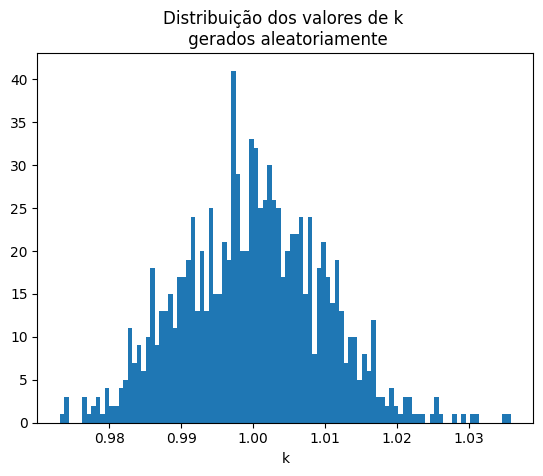

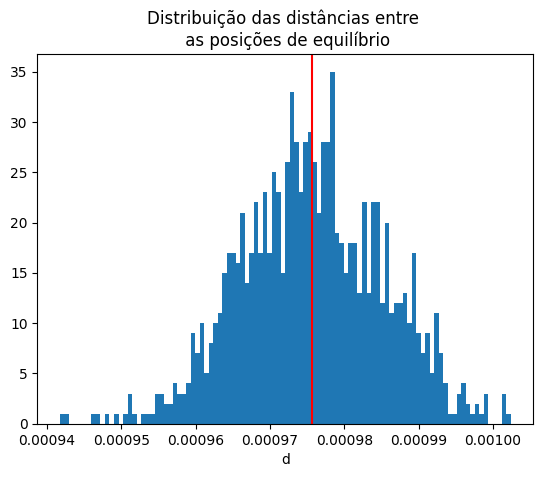

In [41]:
N = 2**10 #número de massas
kk = np.random.normal(μ, σ, N + 1) #array com valores de k aleatórios

A, u = sistemaMolas(kk) #sistema
X = GaussPiv(A, u) #posições de equilíbrio
ds = X[1:] - X[:-1] #distâncias entre as posições de equilíbrio

#histograma com os valores de k aleatórios
plt.hist(kk, 100)
plt.xlabel('k')
plt.title('Distribuição dos valores de k \n gerados aleatoriamente')
plt.show()

#histograma com as distâncias entre as posições de equilíbrio
plt.hist(ds, 100)
plt.xlabel('d')
plt.title('Distribuição das distâncias entre \n as posições de equilíbrio')
plt.axvline(1/(N + 1), color = 'red')
plt.show()

4. Fazendo a mudança de variável, $x_{i}=X_{i}-X_{i}^{eq}$ podemos transformar
o sistema de equações diferenciais em,
\begin{equation}
\frac{d^{2}x_{i}}{dt^{2}}=A_{ij}x_{j}\qquad\text{com }1\le i\le N
\end{equation}
onde é usada a convenção de índices repetidos e a matriz $A$ é simétrica
e tridiagonal.

(a) Note que sabendo os valores próprios do sistema de $A$, $\lambda_{\beta}$, e os respectivos vectores próprios $v_{i}^{\beta}$ (devidamente normalizados $\sum_{i}v_{i}^{\beta}v_{i}^{\alpha}=\delta_{\alpha\beta}$), podemos construir um novo conjunto de variáveis,\begin{equation}f_{\beta}=U_{\beta i}^{T}x_{i} \end{equation} onde $U$ é uma matriz ortogonal com os vectores próprios, $v_{i}^{\beta},$em cada coluna e $U^{T}$ é a sua transposta ($U_{j\alpha}U_{\alpha i}=\delta_{ji}$).
Note-se ainda, que 
\begin{equation}
\sum_{i,j}U_{\beta i}^{T}A_{ij}U_{j\alpha}=D_{\alpha\beta}
\end{equation}
onde $D$ é a matriz diagonal com os valores, $D_{\alpha\alpha}=\lambda_{\alpha}$.
Fazendo a mudança de coordenadas associada a esta transformação ortogonal,
obtemos o seguinte sistema equivalente
\begin{align*}
\frac{d^{2}f_{\beta}}{dt^{2}} & =D_{\beta\alpha}f_{\alpha}.
\end{align*}
Como $D$ é diagonal as equações desacoplam, i.e.
\begin{equation}
\frac{d^{2}f_{\beta}}{dt^{2}}=\lambda_{\beta}f_{\beta},
\end{equation}
que admitem soluções da forma
\begin{equation}
f_{\beta}=A_{\beta}e^{t\sqrt{\lambda_{\beta}}}+B_{\beta}e^{-t\sqrt{\lambda_{\beta}}}
\end{equation}
Logo a diagonalização da matriz $A$ permite a solução do sistema
de equações no tempo. Utilize a decomposição $QR$ para obter, quer
os valores próprios, quer os vectores próprios de uma matriz com $k_{i}$
aleatórios como descrito anteriormente ( $N=10$).

As colunas da matriz imprimida correspondem aos autovetores da matriz A e o array imprimido em seguida é composto pelos autovalores respetivos.

Sabemos que os autovetores são perpendiculares. Para confirmar se estão normalizados, calculamos a sua norma (terceiro array imprimido) e vemos que, para todos eles, é 1. 

Assim, concluímos que a função apresentada nos fornece os autovetores já normalizados.

Podemos confirmar que os resultados obtidos estão corretos já que se verifica $AU = UD$, em que $U$ é a matriz cujas colunas são os autovetores da matriz $A$ e $D$ a matriz diagonal cujos valores dessa diagonal são os autovalores de $A$.

In [42]:
def decompQR(A):
    '''
    A --> matriz cuja decomposição QR será calculada; deve ser uma matriz quadrada
    
    Retorna duas matrizes Q e R, por esta ordem, correspondentes à decomposição QR da matriz A.
    Q é uma matriz ortogonal e R é uma matriz triangular superior
    '''
    
    N = len(A) #dimensões das matrizes
    U = A.copy() #matriz auxiliar aos cálculos
    Q = np.zeros([N, N], dtype = float)
    R = np.zeros([N, N], dtype = float)
    
    #construção das matrizes Q e U
    Q[:, 0] = U[:,0]/np.linalg.norm(U[:, 0])
    for i in range(1, N):
        for j in range(i):
            U[:, i] -= (Q[:, j] @ A[:, i]) * Q[:, j]
        Q[:, i] = U[:, i]/np.linalg.norm(U[:, i])
    
    #construção da matriz R
    for i in range(N):
        R[i, i] = np.linalg.norm(U[:, i])
        for j in range(i + 1, N):
            R[i, j] = Q[:, i] @ A[:, j]
    
    return Q, R

def eigenQR(A, ϵ = 1e-8):
    '''
    A --> matriz cujos autovetores e autovalores serão calculados
    ϵ --> precisão a alcançar
    
    Retorna uma matriz cujas colunas são os autovetores da matriz A e um array cujos valores são os correspondentes autovalores.
    Estes valores são calculados através do algoritmo QR.
    '''
    N = len(A)
    oldA = np.copy(A)
    updateA = np.copy(A)
    U = np.identity(N)
    dif = np.inf
    
    while (dif > ϵ):
        Q, R = decompQR(oldA)
        updateA = R @ Q
        U = U @ Q
        dif = np.abs(updateA - oldA).max()
        oldA = updateA
        
    λs = np.diag(oldA)
    
    return U, λs

N = 10
kk = np.random.normal(μ, σ, N + 1)

S, v = sistemaMolas(kk)
U, λ = eigenQR(S)

print('Autovetores: \n ', U,'\n\n\nAutovalores: \n ', λ)

#calcular a norma dos autovetores, pela mesma ordem por que aparecem em U
norma = np.zeros(N)

for i in range(N):
    norma[i] = np.linalg.norm(U[:, i])
    
print('\n\nNorma dos autovetores: \n ', norma)

print('\n\nAU = UD?\n\n AU =', S @ U, '\n\n UD =', U * λ)

Autovetores: 
  [[ 0.12358191  0.24854479  0.31282624  0.38555149  0.42694938  0.42319613
   0.38430904  0.31695818  0.22961999  0.11908311]
 [-0.2323304  -0.41258644 -0.40575948 -0.31195266 -0.11647674  0.12874625
   0.32390292  0.41894481  0.38819694  0.22928727]
 [ 0.31198188  0.43478964  0.21299512 -0.13205985 -0.39307352 -0.38232597
  -0.11122432  0.23504337  0.42403455  0.32049504]
 [-0.36455403 -0.32010261  0.1298269   0.42972087  0.23511993 -0.24287371
  -0.42420734 -0.11641877  0.32454255  0.38732099]
 [ 0.40637161  0.12222377 -0.3941877  -0.24471121  0.31930174  0.32207119
  -0.23364757 -0.3893792   0.11898167  0.42262099]
 [-0.42239938  0.10516249  0.39805478 -0.21297877 -0.32701136  0.32444057
   0.22435204 -0.38883752 -0.11914066  0.42283683]
 [ 0.39947264 -0.30154044 -0.13072388  0.42477566 -0.2263872  -0.23101959
   0.422877   -0.11939873 -0.32145748  0.38850321]
 [-0.34061022  0.40254926 -0.22249166 -0.14074414  0.39019595 -0.38792042
   0.12689835  0.22963039 -0.420405

(b) Sabendo a forma das equações próprias do sistema, a evolução temporal
nas coordenadas $x_{i}(t)$ é dada por 
\begin{equation}
x_{i}=U_{i\beta}A_{\beta}e^{t\sqrt{\lambda_{\beta}}}+U_{i\beta}B_{\beta}e^{-t\sqrt{\lambda_{\beta}}}
\end{equation}
Logo para determinar a evolução temporal, apenas falta definir as
contantes $A_{\beta}$ e $B_{\beta}$ a partir das condições iniciais.
Tome como condição inicial as velocidades nulas e as posições aleatórias
com $x\in]-1/(N+1),1/(N+1)[$. Obtenha as constantes $A_{\beta}$
e $B_{\beta}$.

Como todos os autovalores sao negativos, as raízes presentes em expoente na equação inicial serão números complexos. Assim, podemos escrever:

$$
x_i = U_{i \beta} A_{\beta} e^{it\sqrt{-\lambda_{\beta}}} + U_{i \beta} B_{\beta} e^{-it\sqrt{-\lambda_{\beta}}}
$$

Podemos derivar esta expressão para obter a velocidade da massa em cada instante:

$$
x_i' = i\sqrt{-\lambda_{\beta}} U_{i\beta} A_{\beta} e^{it\sqrt{-\lambda_{\beta}}} - i\sqrt{-\lambda_{\beta}} U_{i\beta} B_{\beta} e^{-it\sqrt{-\lambda_{\beta}}}
$$

Temos como condição inicial velocidades nulas, para todas as massas, pelo que ficamos com (para $t=0$):

\begin{align}
x_i' &= 0 \\
\Leftrightarrow i\sqrt{-\lambda_{\beta}} U_{i\beta} A_{\beta} &= i\sqrt{-\lambda_{\beta}} U_{i\beta} B_{\beta} \\
\Leftrightarrow A_{\beta} &= B_{\beta}
\end{align}

Substituindo na expressão de $x_i$, obtemos:

\begin{align}
x_i &= U_{i\beta} \, A_{\beta} \, \big(cos \big(t \sqrt{-\lambda} \big) + i\, sin \big(t \sqrt{-\lambda} \big) + cos \big(t \sqrt{-\lambda} \big) - i\, sin \big(t \sqrt{-\lambda} \big) \big) \\
&= 2 \, U_{i\beta} \, A_{\beta} \, cos \big(t \sqrt{-\lambda} \big)
\end{align}

Já que queremos calcular $A_{\beta}$, considerando as posições iniciais $x_{i}(0)$ obter a seguinte expressão:

$$
A_{\beta} = \frac{U_{i\beta}^{\,T} \, x_{i}(0)}{2}
$$

Vamos calcular $A_{\beta}$ para o sistema já calculado na alínea anterior, pelo que utilizamos os autovetores já calculados (colunas da matriz U).

In [43]:
xx0 = np.random.uniform(-1/(N + 1), 1/(N + 1), 10) #posições iniciais aleatórias

Aβ = U.T @ xx0 / 2

print('Aβ = Bβ =', Aβ)

Aβ = Bβ = [ 0.02373505 -0.00999933  0.03817911 -0.02101887 -0.02213822  0.00574654
  0.04732892  0.04998538  0.02101244  0.00883403]


(c) Represente no tempo a posição de cada uma das massas a partir das condições iniciais da alínea anterior.

Como utilizamos a massa $m$ como unidade de medida, temos $m = 1$.

Já que a constante de tempo vai depender dos valores de $k$ e estes são escolhidos aleatoriamente na alínea a), para o limite máximo do intervalo de tempo representado utilizei um valor dependente da constante de tempo. desta forma, sempre que sejam alterados os valores de $k$ utilizados, o intervalo de tempo usado é adaptado para termos uma boa representação gráfica.

Após o cálculo dos valores de $x_i(t)$, é necessário adicionar a estes os valores das posições de equlíbrio para cada massa ($X_{eq}$), de forma a voltarmos ao sistema de coordenadas inicial ($X_i(t)$). 

Observando a representação gráfica obtida, podemos observar, dependendo dos valores de $x_i(0)$ gerados aleatoriamente, algumas linhas a cruzarem-se. Tendo em conta que cada uma das linhas representa $X_i(t)$ para cada uma das massas, os pontos em que as linhas se cruzam corresponderiam, num caso real, a colisões entre as massas, pelo que a progressão no tempo das massas representada por este modelo não corresponde à realidade, a partir deste instante.

Também podemos, por vezes, ter posições superiores a 1 ou inferiores a 0, que, por raciocínio análogo ao já apresentado, levariam a colisões das massas com as paredes. Mais uma vez, a progressão no tempo das massas representada por este modelo não corresponde à realidade, a partir do instante em que $x_i = 0$ ou $x_i = L$.


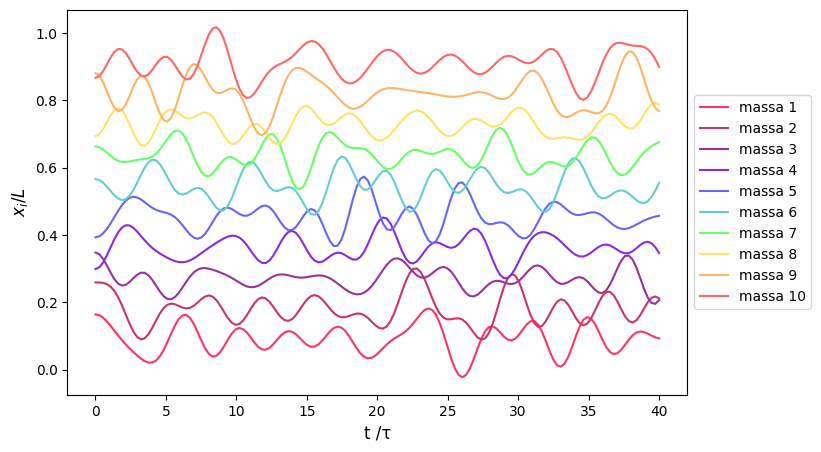

In [44]:
τ = math.sqrt(1/np.average(kk))
t = np.linspace(0, 40*τ, 150)

xi = 2 * U * Aβ @ np.cos(np.outer(np.sqrt(-λ), t)) #posições das massas ao longo do tempo com as novas variáveis

Xeq = GaussPiv(S, v) #posições de equilíbrio

#mudança para as variáveis originais
for j in range(len(xi)):
    xi[j] += Xeq[j]
    
#representação gráfica
plt.subplots(figsize=(8, 5))
for i in range(len(cores)):
    plt.plot(t, xi[i], color=cores[-1-i], label = 'massa {}'.format(i+1))
    
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xlabel('t /τ', fontsize = 12)
plt.ylabel(r'$x_i  /L$', fontsize = 12)

plt.show()

<div style="border:1px solid black;">
<br><div style="color:red; font-weight:bold;">Comentário:</div>

O meu colega mostra que compreende o objetivo do problema, conseguindo executá-lo de modo a obter os resultados esperados. Os pontos fortes do trabalho são:
- O código é legível e eficiente, estando também bem comentado.
- A verificação dos resultados do programa que determina os autovalores e autovetores de uma matriz.


Dito isto, existem alguns aspetos a melhorar:
- Na determinação de $A_{\beta}$ e $B_{\beta}$ concluiu erradamente que $A_{\beta} = (U_{i\beta}^{\,T} \, x_{i}(0))/2$ quando deveria ter determinado que:
$$
\begin{align*}
A_{\beta} &= \frac{U_{\beta i}^{\,T} \, x_{i}(0)}{2}
\\[0.2cm]
&= \frac{U_{i\beta} \, x_{i}(0)}{2}
\end{align*}
$$
Ou seja, parece que trocou a ordem dos índices. Apesar disso, escreveu corretamente o código para determinar $A_\beta$. Podemos perceber que esta expressão é a correta lembrando que na convenção de indíces repetidos a inversa de $U_{i\beta}$ não é $U_{i\beta}^T$ mas sim $U_{\beta i}^T$ pois no produto matricial temos de percorrer as linhas da matriz à esquerda enquanto percorremos as colunas da matriz à direita. De forma mais explícita, temos a seguinte situação, onde $\mathcal I$ é a matriz identidade:
$$
\begin{align*}
(U^{-1})_{j i} U_{ik} = \mathcal I_{jk} &\Leftrightarrow (U^{T})_{ji} U_{ik} = \mathcal I_{jk}
\\[0.2cm]
&\Leftrightarrow U_{ij} U_{ik} = \mathcal I_{jk}
\end{align*}
$$

- Análise dos resultados na última alínea do problema. A análise foi bem feita mas poderia estar ainda melhor, notando por exemplo que as massas oscilam em torno da sua posição de equilíbrio como seria de esperar, ou que a fração de tempo para uma dada massa $i$ durante o qual está à direita da massa $i+1$ (ou à esquerda de $i-1$) é muito pequeno.

- Devia ter usado $\sigma = \text{0,1}$ em vez de $\sigma = \text{0,01}$.

</div>

# Sistema de massas forçado
Considere o sistema de massas discutido na pergunta anterior e aplique
uma força na massa $l$ dada por, 
\begin{align*}
F_{l} & =Fe^{i\Omega t}\\
m\frac{d^{2}x_{i}}{dt^{2}} & =-k_{i}\left(x_{i}-x_{i-1}\right)+k_{i+1}\left(x_{i+1}-x_{i}\right)+\delta_{il}Fe^{i\Omega t-\gamma|t|}
\end{align*}

Fazendo a transformada de Fourier, desta equação obtemos 
\begin{equation}
-m\omega^{2}x_{i}(\omega)=-k_{i}\left(x_{i}(\omega)-x_{i-1}(\omega)\right)+k_{i+1}\left(x_{i+1}(\omega)-x_{i}(\omega)\right)+\frac{2\gamma F}{\gamma^{2}+(\omega-\Omega)^{2}}\delta_{il}
\end{equation}
onde para cada $\Omega$ obtemos uma solução $x_{i}(\omega)$. Analisando,
apenas para $\omega=\Omega$ e considerando $\tilde{F}=2F/\gamma$

1. Considerando o sistema aleatório com $N=10$ e $\tilde{F}=1$ e $l=1$, represente num gráfico com as ordenadas em escala logarítmica as soluções $|x_{i}(\Omega)|$ como função de $\Omega$. Todas as curvas têm os mesmos máximos?

A massa $l = 1$ ($x_1$) corresponderá, nos arrays a baixo, ao índice 0, pelo que é definido l = 0.

A partir da equação obtida no enunciado pela transformada de Fourier e sabendo que $\omega = \Omega$, obtemos:

\begin{align}
k_i x_{i-1} -\left(k_i + k_{i+1} - m\Omega^2\right) x_i + k_{i+1} x_{i+1} &= - \frac{2F}{\gamma} \delta_{il} \\ 
k_i x_{i-1} -\left(k_i + k_{i+1} + m\Omega^2\right) x_i + k_{i+1} x_{i+1} &= -\tilde F \delta_{il}
\end{align}

Sabemos que o delta de Kronecker é dado por:

$$
\delta_{il} =\begin{cases} 0 \text{, se } i \neq l \\ 1 \text{, se } i = l\end{cases}
$$

Assim, como aplicamos a força na primeira massa, para esta temos:

$$
- (k_1 + k_2 - m\Omega^2) x_1 + k_2 x_2 = -\tilde F
$$

Para as restantes, obtemos:

$$
k_i x_{i-1} - \left(k_i + k_{i+1} - m \Omega^2 \right) x_i + k_{i+1} x_{i+1} = 0
$$

Mais concretamente, para a última massa, temos $x_{N+1} = L = 1$, pelo que obtemos:

$$
k_N x_{N-1} - \left(k_N + k_{N+1} - m\Omega \right) x_N = 0
$$

Observando a represnetação gráfica obtida, vemos que todas as linhas têm máximos para os mesmos valores de $\Omega$, para além de estes máximos não terem os mesmos valores. Isto acontece porque os valores de $\Omega$ para os quais temos estes picos correspondem a frequêcias de ressonância do sistema, que irão causar ressonância de cada uma das massas para as mesmas frequências.

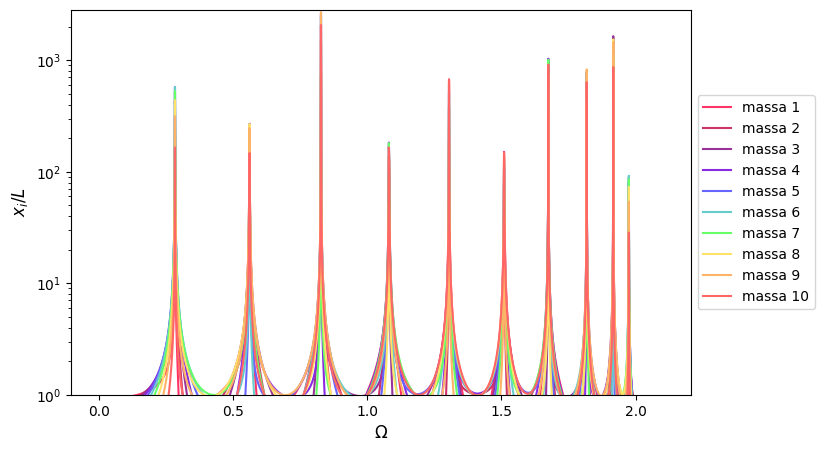

In [45]:
def sistemaMolasForca(ks, Ω, l, Ftil):
    '''
    ks   --> array com valores de k que caracterizam todas as molas, pela ordem em que estão presentes no sistema 
    Ω    --> frequência da força aplicada
    l    --> posição da massa em que é aplicada a força
    Ftil --> 2F/γ, em que F é a intensidade da força aplicada
    
    Retorna uma matriz com os coeficientes do sistema de equações, em que cada coluna diz respeito a uma variável e cada linha a uma equação, e um vetor com os termos independentes de cada equação.
    Note-se que se assume que todas as massas do sistema têm valor 1, bem como o seu comprimento.
    '''
    
    N = len(ks) - 1 #número de massas
    
    #construção da matriz dos coeficientes
    M = np.diag(- (ks[:-1] + ks[1:] - Ω * Ω)) + np.diag(ks[1:-1], 1) + np.diag(ks[1:-1], -1)
    
    #construção do vetor com os termos independentes
    v = np.zeros(N)
    
    v[l] -= Ftil
        
    return M, v

N = 10 #número de massas
kk = np.random.normal(μ, σ, N + 1)
Ft = 1 #dependente da força exercida
l = 0 #número da massa - 1

Ωs = np.arange(0, 2.1*τ, 1e-3) #valores de Ω visualizados

xxi = np.empty((N, len(Ωs)), float) #cada linha diz respeito a uma massa e cada coluna a um valor do array Ωs

#calcular a posição de cada massa para cada Ω
for i in range(len(Ωs)):
    A, u = sistemaMolasForca(kk, Ωs[i], l, Ft)
    xxi[:, i] = np.abs(GaussPiv(A,u))

#representação gráfica
plt.subplots(figsize=(8, 5))
for i in range(len(cores)):
    plt.plot(Ωs, xxi[i], color=cores[-1-i], label = 'massa {}'.format(i+1))

plt.ylim(bottom = 1)
plt.yscale('log')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.xlabel(r'$\Omega$', fontsize = 12)
plt.ylabel(r'$x_i  /L$', fontsize = 12)
plt.show()

2. Identifique na alínea anterior a posição dos valores próprios do sistema.

Sabemos que $A -\lambda I = 0$, em que $\lambda$ é um autovalor da matriz $A$. Para o sistema livre em estudo, temos $AX = -m\Omega^2 X$, em que $X$ são as diversas variáveis dos sistema, isto é:

$$
X = \left(\begin{matrix} X_1 \\ \dots \\ X_N \end{matrix}\right)
$$

Assim, temos $(A + m\Omega^2) X = 0$  e, portanto, obtemos:

$$
\begin{align}
m \Omega^2 = -\lambda \quad \Leftrightarrow \quad \Omega = \sqrt{-\lambda}
\end{align}
$$

Por este motivo, foram representados os valores de $\sqrt{-\lambda}$ ao invés dos valores de $\lambda$. Podemos ver que os autovalores do sistema livre correspondem às frequências de ressonância do sistema forçado.

Como considerámos $\omega = \Omega$, os cálculos efetuados são para o regime estacionário de oscilação, sem necessidade de um regime transitório, pelo que faz sentido que as frequências de ressonância do sistema forçado sejam iguais às do sistema livre.

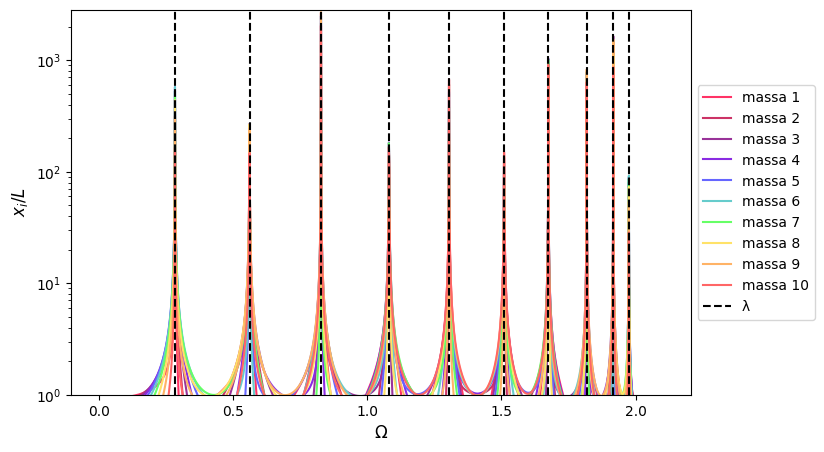

In [46]:
S, v = sistemaMolas(kk) #sistema livre
U, λs = eigenQR(S) #autovetores e autovalores do sistema livre

λq = np.sqrt(-λs)

#representação gráfica
plt.subplots(figsize=(8, 5))
for i in range(len(cores)):
    plt.plot(Ωs, xxi[i], color=cores[-1-i], label = 'massa {}'.format(i+1))
    
#representação dos autovalores
plt.axvline(λq[0], linestyle = '--', color = 'black', label = 'λ')
for λ in λq[1:]:
    plt.axvline(λ, linestyle = '--', color = 'black')
    
plt.ylim(bottom = 1)
plt.yscale('log')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.xlabel('Ω', fontsize = 12)
plt.ylabel(r'$x_i  /L$', fontsize = 12)
plt.show()

3.  Escolha algumas das frequências onde existem os picos e as respectivas soluções $x_{i}$. Para cada uma das soluções escolhidas, normalize-a e transforme as suas coordenadas calculando,
\begin{equation}
f_{\beta}=U_{\beta i}^{T}x_{i}.
\end{equation}
Represente cada um dos $\left|f_{\beta}\right|$ que obteve. Que conclusões pode tirar?

Já vimos que as raízes dos valores simétricos dos autovalores do sistema livre correspondem às frequências em que temos picos para este sistema, pelo que iremos usar as frequências $\Omega = \sqrt{-\lambda}$.

No gráfico abaixo, cada uma das representações de $\left|f_\beta\left(\sqrt{-\lambda}\right)\right|$ diz respeito a um modo normal do sistema, pelo que faz sentido que cada uma delas tenha apenas um pico, já que cada autovalor diz respeito a um modo normal e, portanto, a um $f_\beta$. Isto significa que todos os modos normais do sistema estão a contribuir para a oscilação das massas.

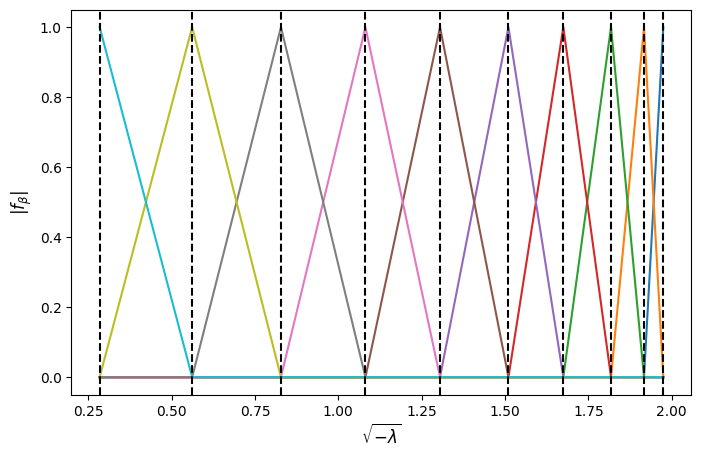

In [47]:
xii = np.empty((N, len(λq)), float) #cada linha diz respeito a uma massa e cada coluna a um autovalor

for i in range(len(λq)):
    A, u = sistemaMolasForca(kk, λq[i], l, Ft)
    xii[:, i] = GaussPiv(A,u)
    xii[:, i] /= np.linalg.norm(xii[:, i]) #normalizar as soluções, para cada frequência

fβ = np.abs(U.T @ xii)

plt.subplots(figsize=(8, 5))
plt.plot(λq, fβ)

#representação dos autovalores
plt.axvline(λq[0], linestyle = '--', color = 'black', label = 'λ')
for λ in λq[1:]:
    plt.axvline(λ, linestyle = '--', color = 'black')
    
plt.ylabel(r'$|f_β|$', fontsize = 12)
plt.xlabel(r'$\sqrt{-\lambda}$', fontsize = 12)
plt.show()

4. Repita o procedimento anterior adicionando uma outra força para $i=10$ mas com amplitude $\tilde{F}=-1$ na equação da transformada de Fourier (mantemos a força em $l=1$). O que observa? 

Neste caso, teremos a seguinte equação:

$$
\begin{align}
-m\omega^{2} x_{j} = -k_{j} \left(x_{j} - x_{j-1}\right) + k_{j+1} \left(x_{j+1} - x_{j}\right) + \tilde F_l \delta_{jl} + \tilde F_i \delta_{ji}
\end{align}
$$
$$
\begin{align}
k_i x_{j-1} -\left(k_j + k_{j+1} + m\Omega^2\right) x_j + k_{j+1} x_{j+1} &= -\tilde F_l \delta_{jl} - \tilde F_i \delta_{ji}
\end{align}
$$

em que $l = 0$, $i = 10$, $\tilde F_l = 1$ e $\tilde F_i = -1$.

Assim, temos, para a primeira massa:

$$
- (k_1 + k_2 - m\Omega^2) x_1 + k_2 x_2 = -\tilde F_l
$$

Para a última massa, obtemos:

$$
k_N x_{N-1} - \left(k_N + k_{N+1} - m\Omega \right) x_N = -\tilde F_i
$$

Para as restantes massas, ficamos com:

$$
k_j x_{j-1} - \left(k_j + k_{j+1} - m \Omega^2 \right) x_j + k_{j+1} x_{j+1} = 0
$$

Comparando esta situação com a anterior, vemos que os picos 1, 3, 5, 7 e 9 ficam bastante reduzidos, praticamente inexistentes.

Isto acontece porque, para esta situação, temos uma força oposta, que anula parte do movimento - temos sobreposição dos movimentos gerados pelas duas forças. Seria de esperar que, para o caso em que temos k = 1 para todas as molas, estes picos desaparecessem.

Assim, faz sentido que alguns dos picos se anulem, enquanto outros se mantém.

Verificamos isto também a partir do gráfico de $\left|f_\beta\left(\sqrt{-\lambda}\right)\right|$, já que, seguindo a interpretação da questão 2.3, apenas os modos normais 2, 4, 6, 8 e 10 contribuem para a oscilação das massas.

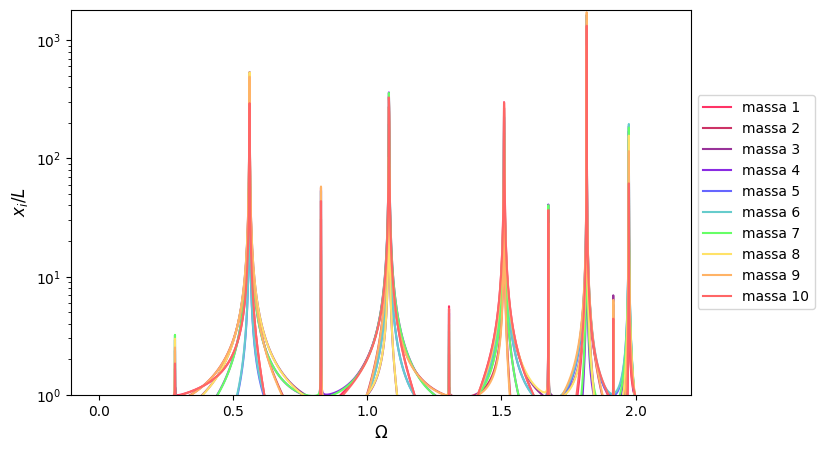

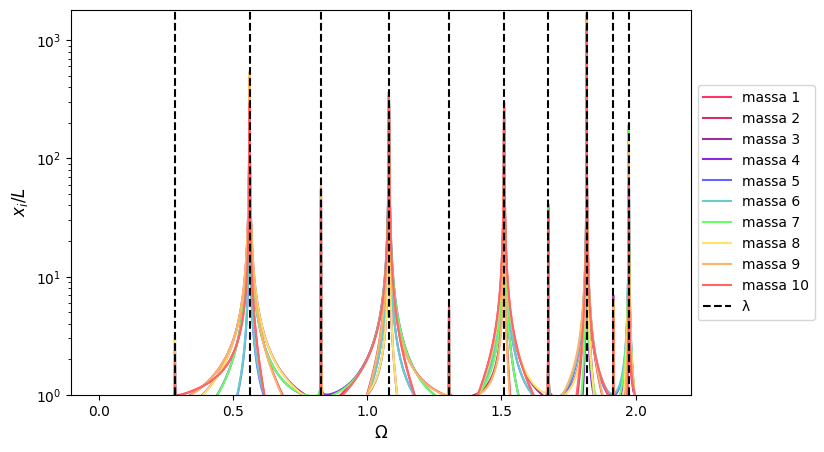

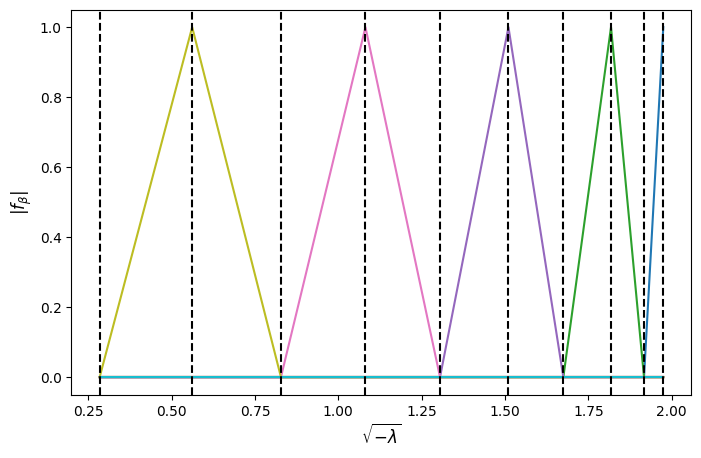

In [48]:
def sistemaMolasForca2(ks, Ω, l, i, Ftl, Fti):
    '''
    ks   --> array com valores de k que caracterizam todas as molas, pela ordem em que estão presentes no sistema 
    Ω    --> frequência da força aplicada
    l    --> posição da massa em que é aplicada a primeira força
    i    --> posição da massa em que é aplicada a segunda força
    Ftl  --> 2 Fl/γ, em que Fl é a intensidade da primeira força aplicada
    Fti  --> 2 Fi/γ, em que Fi é a intensidade da segunda força aplicada
    
    Retorna uma matriz com os coeficientes do sistema de equações, em que cada coluna diz respeito a uma variável e cada linha a uma equação, e um vetor com os termos independentes de cada equação.
    Note-se que se assume que todas as massas do sistema têm valor 1, bem como o seu comprimento.
    '''
    
    N = len(ks) - 1 #número de massas
    
    #construção da matriz dos coeficientes
    M = np.diag(- (ks[:-1] + ks[1:] - Ω * Ω)) + np.diag(ks[1:-1], 1) + np.diag(ks[1:-1], -1)
    
    #construção do vetor com os termos independentes
    v = np.zeros(N)
    
    v[l] -= Ftl
    v[i] -= Fti
        
    return M, v

Ft1 = 1 #2F/γ para a primeira força exercida
l = 0 #número da primeira massa - 1
Ft2 = -1 #2F/γ para a segunda força exercida
j = 9 #número da segunda massa - 1

xxi2 = np.empty((N, len(Ωs)), float) #cada linha diz respeito a uma massa e cada coluna a um valor do array Ωs



#representação gráfica de |x_i(Ω)|
for i in range(len(Ωs)):
    A, u = sistemaMolasForca2(kk, Ωs[i], l, j, Ft1, Ft2)
    xxi2[:, i] = np.abs(GaussPiv(A,u))

plt.subplots(figsize=(8, 5))
for i in range(len(cores)):
    plt.plot(Ωs, xxi2[i], color=cores[-1-i], label = 'massa {}'.format(i+1))
    
plt.ylim(bottom = 1)
plt.yscale('log')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.xlabel(r'$\Omega$', fontsize = 12)
plt.ylabel(r'$x_i  /L$', fontsize = 12)
plt.show()



#representação gráfica de |x_i(Ω)| com os autovalores
plt.subplots(figsize=(8, 5))
for i in range(len(cores)):
    plt.plot(Ωs, xxi2[i], color=cores[-1-i], label = 'massa {}'.format(i+1))
    
plt.axvline(λq[0], linestyle = '--', color = 'black', label = 'λ')

#representação dos autovalores
for λ in λq[1:]:
    plt.axvline(λ, linestyle = '--', color = 'black')

plt.ylim(bottom = 1)
plt.yscale('log')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.xlabel(r'$\Omega$', fontsize = 12)
plt.ylabel(r'$x_i  /L$', fontsize = 12)
plt.show()



#representação gráfica de fβ
xii2 = np.zeros((N, len(λq)), float) #cada linha diz respeito a uma massa e cada coluna a um autovalor

for i in range(0, len(λq), 2):
    A, u = sistemaMolasForca2(kk, λq[i], l, j, Ft1, Ft2)
    xii2[:, i] = GaussPiv(A,u)
    xii2[:, i] /= np.linalg.norm(xii2[:, i]) #normalizar as soluções, para cada frequência
    
fβ2 = np.abs(U.T @ xii2)

plt.subplots(figsize=(8, 5))
plt.plot(λq, fβ2)

#representação dos autovalores
plt.axvline(λq[0], linestyle = '--', color = 'black', label = 'λ')
for λ in λq[1:]:
    plt.axvline(λ, linestyle = '--', color = 'black')
    
plt.ylabel(r'$|f_β|$', fontsize = 12)
plt.xlabel(r'$\sqrt{-\lambda}$', fontsize = 12)
plt.show()

<div style="border:1px solid black;">
<br><div style="color:red; font-weight:bold;">Comentário:</div> 

Observamos de novo uma compreensão total do problema e uma execução com código de elevada qualidade. Alguns pontos fortes nesta resolução são:
- A análise dos resultados na questão 2.1 onde é feita a associação entre os picos no gráfico de $|x_i(\Omega)|$ e as frequências de ressonância do sistema.

- A análise dos resultados na questão 2.4 sendo que podemos confirmar que de facto os picos de índice ímpar desaparacem se todos os $k$ forem iguais.

Tal como no problema anterior, continuam a existir alguns aspetos de melhoria:
- Na questão 2.1 diz corretamente que $x_{N+1} = L$ mas ao escrever na equação da transformada de Fourier usa $x_{N+1} = 0$. Não explicitou as variáveis independentes, o que gera alguma confusão. Devia ter indicado que $x_{N+1}(t) = L$ pelo que para $\Omega \ne 0$ se tem $x_{N+1}(\Omega) = 0$.

- Na questão 2.2 escreve erradamente que $A - \lambda I = 0$ em vez de $(A - \lambda I)X = 0$. Também nesta questão indica que $\Omega = \sqrt{-\lambda}$ são as frequências de ressonância já que $-\Omega^2$ correspondem aos autovalores de $A$. Esta afirmação está correta mas o raciocínio não é explicado completamente. Inicialmente apenas podemos identificar os autovalores da matriz de coeficientes como as frequências de modo normal do sistema. Para dizer que $\sqrt{-\lambda}$ também correspondem às frequências de ressonância temos de notar que no sistema não há amortecimento!

- Na questão 2.3 a representação gráfica não está correta. Cada vetor $f_\beta$ foi calculado a partir de um dado valor de $\sqrt{-\lambda}$. Como tal e notando que $f_\beta$ é um vetor, no gráfico deste problema o eixo dos $xx$ devia estar representado $\beta$ e não $\sqrt{-\lambda}$, de modo a podermos a ver o módulo de cada uma das componentes de $f_\beta$. Nesta representação temos ainda que a cada cor corresponde um $f_\beta$ diferente com um $\sqrt{-\lambda}$ associado que poderia ser indicado na legenda.

- Na questão 2.4 no último gráfico apenas vemos $f_\beta$ = 1 para metade dos valores de $\sqrt{-\lambda}$, pode ser algum erro no código pelo facto de termos valores de $|x_i(\Omega)|$ bastante diferentes, dependendo de se $\sqrt{-\lambda}$ corresponde a uma das frequências de ressonância de índice par (pico elevado) ou índice ímpar (pico menor).
</div>


Bom Trabalho